#**Project - Brain Tumor Detection from MRI Images - 6 Fold - D.A**

### **Mounting Google Drive**

In [ ]:
## This line imports the drive module from the google.colab package
from google.colab import drive
##  This line is used to mount the Google Drive to the notebook to  access files stored in their Google Drive account directly from a Colab notebook
drive.mount('/content/drive')

Mounted at /content/drive


### **Import Libraries**

In [ ]:
## Importing libraries offer pre-built functions and modules
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import cv2
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential,load_model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, GlobalAveragePooling2D
import tensorflow as tf
#from keras_flops import get_flops
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
from keras.applications import DenseNet121, DenseNet169, DenseNet201
import io
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1,EfficientNetB2, EfficientNetB3, EfficientNetB4
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from keras.models import Model, Sequential,load_model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.applications import DenseNet121
from tensorflow.keras import models
import numpy as np
from PIL import Image
from IPython.display import display,clear_output
from keras.optimizers import Adam, RMSprop,SGD
from tensorflow.keras.utils import normalize
from warnings import filterwarnings
%matplotlib inline

# **Load Dataset**

In [ ]:
## This code is used to unzip  compressed dataset file located at the specified path in Google Drive.
!unzip '/content/drive/MyDrive/Project/Brain_Tumor_Detection/BT_Dataset_6DA/BT_6DA.zip'

Streaming output truncated to the last 5000 lines.
  inflating: BT_6DA/yes/aug_y357_0_5880.jpg  
  inflating: BT_6DA/yes/aug_y357_0_6654.jpg  
  inflating: BT_6DA/yes/aug_y357_0_7820.jpg  
  inflating: BT_6DA/yes/aug_y358_0_3665.jpg  
  inflating: BT_6DA/yes/aug_y358_0_5240.jpg  
  inflating: BT_6DA/yes/aug_y358_0_6145.jpg  
  inflating: BT_6DA/yes/aug_y358_0_8491.jpg  
  inflating: BT_6DA/yes/aug_y358_0_9241.jpg  
  inflating: BT_6DA/yes/aug_y358_0_9658.jpg  
  inflating: BT_6DA/yes/aug_y358_0_996.jpg  
  inflating: BT_6DA/yes/aug_y359_0_1096.jpg  
  inflating: BT_6DA/yes/aug_y359_0_1436.jpg  
  inflating: BT_6DA/yes/aug_y359_0_3552.jpg  
  inflating: BT_6DA/yes/aug_y359_0_4239.jpg  
  inflating: BT_6DA/yes/aug_y359_0_4820.jpg  
  inflating: BT_6DA/yes/aug_y359_0_6093.jpg  
  inflating: BT_6DA/yes/aug_y359_0_7938.jpg  
  inflating: BT_6DA/yes/aug_y35_0_1560.jpg  
  inflating: BT_6DA/yes/aug_y35_0_1981.jpg  
  inflating: BT_6DA/yes/aug_y35_0_2338.jpg  
  inflating: BT_6DA/yes/aug_y35_0

In [ ]:
## This line of code creates a Python list called labels that contains the target labels or categories of a classification problem.
labels = ['no','yes']

In [ ]:
## In this line of code an empty  list is created called dataset, which is later used to store the preprocessed image data
dataset = []
##  This line creates another empty  list called label, which is used to store the class labels for each image.
label = []

## this variable 'image_size'  stores the desired size (in pixels) of the images after resizing.
image_size = 224
##  This is a Python print statement that displays the string "DataSet" on the console.
print("DataSet")
## This is another Python print statement that displays the string "============" on the console. This is used to create a visual separator between different sections of the output.
print("============")
## This is a for loop that iterates over each element in the labels list. The variable i takes on the value of each element in the list during each iteration of the loop.
for i in labels:
  ## This line creates a string variable folderPath that stores the path of the folder containing the images for the current class label. The os.path.join() function is used to join the folder path with the current class label.
    folderPath = os.path.join('/content/BT_6DA',i)
    ##  This is another for loop that iterates over each image file in the folder corresponding to the current class label. The os.listdir() function returns a list of all the files and folders in the specified directory.
    ## The tqdm is used to display a progress bar for the loop.
    for j in tqdm(os.listdir(folderPath)):
        # reading the images using cv2 library. The os.path.join() function is used to join the folder path with the current file name.
        img = cv2.imread(os.path.join(folderPath,j))
        # This line resizes the image to the desired size of image_size using the cv2.resize() function from OpenCV.
        img = cv2.resize(img,(image_size, image_size))
        ## This line adds the preprocessed image data to the dataset list.
        dataset.append(img)
        ##  This line adds the class label for the current image to the label list.
        label.append(i)
 ## below line converts the dataset list into a NumPy array, which is a more efficient data structure for storing and manipulating large arrays of numerical data.
dataset = np.array(dataset)
## below code  converts the label list into a NumPy array
label = np.array(label)

DataSet


100%|██████████| 10494/10494 [00:42<00:00, 244.49it/s]


## **Plot Sample Images**

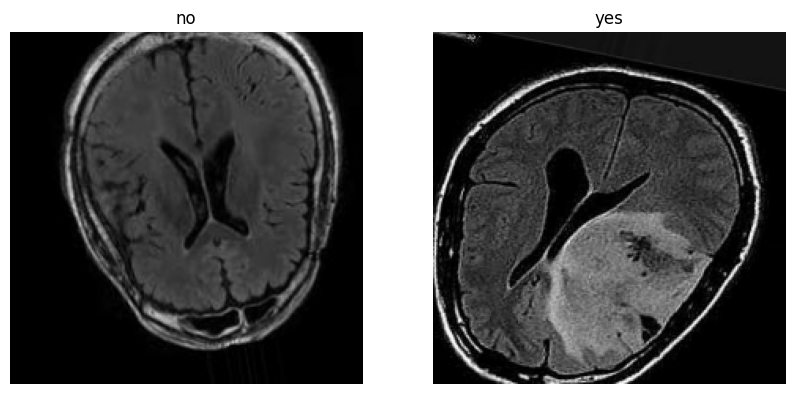

In [ ]:
##  Below code creates a 2x1 grid of subplots by looping through each class label and selects an image with that label from the dataset, and then displays the image on a subplot with the corresponding title.
k=0
fig, ax = plt.subplots(1,2,figsize=(10,10))

for i in labels:
    j=3
    while True :
        if label[j]==i:
            ax[k].imshow(dataset[j])
            ax[k].set_title(label[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

## **Data Shuffling & Normalization**

In [ ]:
## In this code the shuffle() function randomly permutes the order of elements in the input arrays and  'random_state' parameter is set to 101 to ensure that the same shuffling order is generated every time the code is run.
## Overall, this line of code shuffles the dataset and label arrays, and assigns the shuffled arrays to the dataset and label variables.
dataset, label = shuffle(dataset,label, random_state=101)

In [ ]:
# normalize dataset
## This line converts the dataset array from its original data type to a 16-bit floating-point format (float16)
dataset = dataset.astype('float16')
## below line normalizes the pixel values of dataset array in the range of [0,1].
dataset /= 255

In [ ]:
## These lines prints the shape of the dataset and label array, which is a tuple of integers that represents the dimensions of the array.
print("dataset=",dataset.shape)
print("label=",label.shape)

dataset= (20989, 224, 224, 3)
label= (20989,)


### **Splitting dataset into Train and Test Set**

In [ ]:
##  This line uses the train_test_split function from Scikit-Learn to split the dataset and label arrays into training and testing subsets. The test_size parameter sets the fraction of the data to use for testing (in this case, 20%), and the random_state parameter sets a random seed for reproducibility. The shuffle parameter specifies whether to shuffle the data before splitting.
X_train,X_test,y_train,y_test=train_test_split(dataset,label,test_size=0.2,random_state = 3, shuffle=True)
##  This line applies the normalize function from Scikit-Learn to normalize the training data
X_train = normalize( X_train, axis =1)
## This line applies the same normalization to the testing data.
X_test = normalize( X_test, axis =1)
## This line prints the shape of the X_train array, which is the normalized training data.
print("X train=",X_train.shape)
## This line prints the shape of the y_train array, which is the training labels
print("Y train=",y_train.shape)
## This line prints the shape of the X_test array, which is the normalized testing data.
print("X test=",X_test.shape)
## This line prints the shape of the y_test array, which is the testing labels
print("Y test=",y_test.shape)

X train= (16791, 224, 224, 3)
Y train= (16791,)
X test= (4198, 224, 224, 3)
Y test= (4198,)


## **Label Encoding**

In [ ]:
# label encoding - one hot encoding
## This line initializes an empty list called y_train_new.
y_train_new = []
## This loop iterates over each label in y_train and finds the corresponding index in the labels list. It then appends the index to the y_train_new list.
for i in y_train:

    y_train_new.append(labels.index(i))
## This line replaces the original y_train list with the new list that contains numerical labels.
y_train = y_train_new
## This line uses the to_categorical function from Keras to convert the numerical labels in y_train to one-hot encoded vectors. The resulting array has a shape of (num_samples, num_classes).
y_train = tf.keras.utils.to_categorical(y_train)

## This line initializes an empty list called y_test_new.
y_test_new = []
## This loop iterates over each label in y_test and finds the corresponding index in the labels list. It then appends the index to the y_test_new list.
for i in y_test:
    y_test_new.append(labels.index(i))
##  This line replaces the original y_test list with the new list that contains numerical labels.
y_test = y_test_new
## This line uses the to_categorical function from Keras to convert the numerical labels in y_test to one-hot encoded vectors. The resulting array has a shape of (num_samples, num_classes).
y_test = tf.keras.utils.to_categorical(y_test)

<Axes: ylabel='count'>

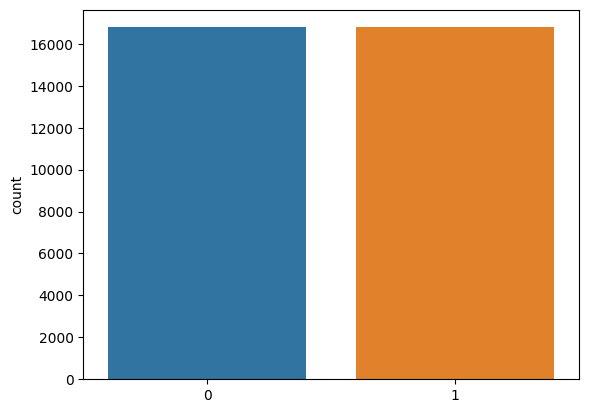

In [ ]:
#Ploting the no.of samples in train data
sns.countplot(y_train)

<Axes: ylabel='count'>

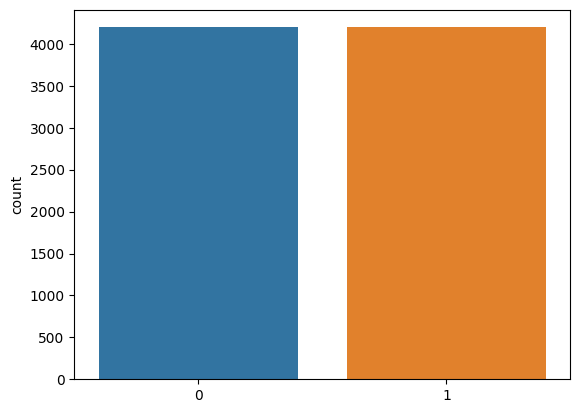

In [ ]:
#Ploting the no.of samples in test data
sns.countplot(y_test)

# **CNN Models from Scratch**

## **6DA-Model 01 - CNN model from scratch with Four Layers - Completed**

In [ ]:
# This line defines the shape of the input images to the model. In this case, it's a 3D tensor with height and width of 224 pixels and 3 channels (RGB).
input_shape = (224, 224, 3)

# Define the model
## This line of code creates a sequential model in Keras, which means the layers will be stacked on top of each other in a linear fashion.
cnn_model = tf.keras.Sequential([
    # Convolutional layer 1
    ## This line adds a 2D convolutional layer to the model with 16 filters, a filter size of (3,3), ReLU activation function, and the previously defined input shape.
    layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    ## This line adds a max pooling layer to the model with a pool size of (2,2).
    layers.MaxPooling2D((2,2)),
    ## This line adds a batch normalization layer to the model, which helps to improve training stability and speed up convergence.
    layers.BatchNormalization(),

    # Convolutional layer 2
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    # Convolutional layer 3
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    # Convolutional layer 4
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),
    ## This line adds a flatten layer to the model, which flattens the output of the previous layer into a 1D vector.
    layers.Flatten(),

    ## This line adds a fully connected layer (Dense) with 256 units and ReLU activation function to the model.
    layers.Dense(256, activation='relu'),
    ##  This line adds a dropout layer to the model with a rate of 0.5, which randomly drops out half of the units during training to prevent overfitting
    layers.Dropout(0.5),
    ## This line adds another batch normalization layer to the model.
    layers.BatchNormalization(),
    ## This line adds the final output layer with 2 units and sigmoid activation function, which is suitable for binary classification problems.
    layers.Dense(2, activation='sigmoid')
])

In [ ]:
## Below line of code print a summary of the neural network model
##  This summary includes information about the layers in the model, the number of parameters in each layer, the output shape of each layer, and the total number of trainable and non-trainable parameters in the model.
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 111, 111, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                      

In [ ]:
# Below code compiles the above neural network model by specifying three below mentioned  important elements.
## Adam optimizer is used, which is a popular optimization algorithm in deep learning that dynamically adjusts the learning rate during training to improve convergence.
## Binary cross-entropy loss is  used to measure the error between the predicted outputs of the model and the actual targets for binary classification problems.
## the accuracy metric is used, which is a common metric for classification problems that measures the proportion of correctly classified samples out of all samples.
cnn_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# checkpoint = ModelCheckpoint("/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/Model2_CNN.h5",monitor="val_loss",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 5, min_delta = 0.001,
                               mode='auto',verbose=1)

### **Training The Model**

In [ ]:
## The below code trains the convolutional neural network model using the fit() method of Keras.
## 'validation_split=0.1' specifies that 10% of the training data will be used for validation during training.
## 'shuffle=True' shuffles the training data before each epoch.
## 'epochs=100 ' specifies the number of epochs to train the model for.
## 'verbose=1 ' specifies that the training progress will be printed to the console after each epoch.
## 'batch_size=32' specifies the batch size for the training data. The batch size determines how many samples are used in each update of the model weights.
history = cnn_model.fit(X_train,y_train,validation_split=0.1, shuffle = True, epochs = 100, verbose=1, batch_size=64,
                   callbacks=[reduce_lr])

Epoch 1/100
237/237 [==============================] - 6s 18ms/step - loss: 0.4186 - accuracy: 0.8263 - val_loss: 0.3845 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 2/100
237/237 [==============================] - 4s 15ms/step - loss: 0.2684 - accuracy: 0.8982 - val_loss: 0.2552 - val_accuracy: 0.9042 - lr: 1.0000e-04
Epoch 3/100
237/237 [==============================] - 4s 16ms/step - loss: 0.1978 - accuracy: 0.9312 - val_loss: 0.2146 - val_accuracy: 0.9214 - lr: 1.0000e-04
Epoch 4/100
237/237 [==============================] - 4s 15ms/step - loss: 0.1359 - accuracy: 0.9595 - val_loss: 0.1787 - val_accuracy: 0.9345 - lr: 1.0000e-04
Epoch 5/100
237/237 [==============================] - 4s 15ms/step - loss: 0.0938 - accuracy: 0.9745 - val_loss: 0.1778 - val_accuracy: 0.9315 - lr: 1.0000e-04
Epoch 6/100
237/237 [==============================] - 4s 16ms/step - loss: 0.0653 - accuracy: 0.9863 - val_loss: 0.1834 - val_accuracy: 0.9310 - lr: 1.0000e-04
Epoch 7/100
237/237 [=============

In [ ]:
#saving the trained model
cnn_model.save('/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/6dAmodel1_CNN.h5')

### **Model Training and Validation Curves and Loss Curves**

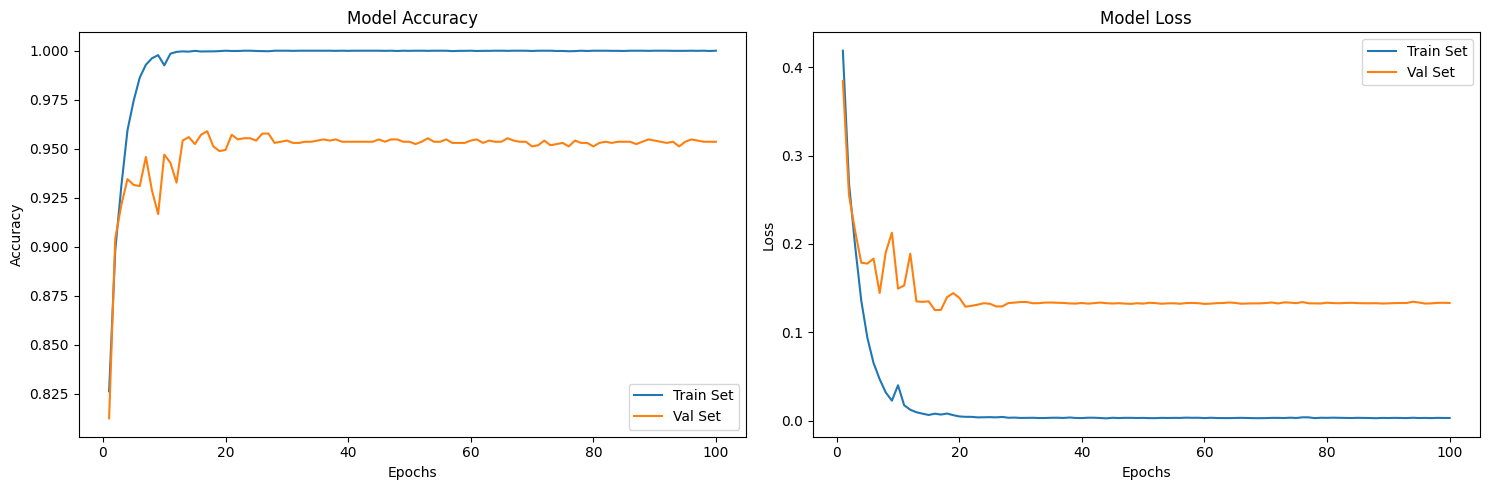

In [ ]:
## This code is used to visualize the training and validation accuracy, as well as the training and validation loss, of the trained CNN model.
## The history object contains information about the training process, including the accuracy and loss values at each epoch.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

## The first subplot shows the training and validation accuracy over the number of epochs. The second subplot shows the training and validation loss over the number of epochs. The epochs_range is the number of epochs that the model was trained for.
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### **Prediction on Test Data**

In [ ]:
##  This line uses the predict method of the trained CNN model to make predictions on the test set X_test. The predict method returns an array of predicted probabilities for each class in the model.
pred = cnn_model.predict(X_test)
## This line uses the argmax function of NumPy to find the class with the highest predicted probability for each sample in the test set.
pred = np.argmax(pred,axis=1)
##  This line uses the argmax function of NumPy to find the true class label for each sample in the test set.
y_test_new = np.argmax(y_test,axis=1)

132/132 [==============================] - 1s 4ms/step


### **Evaluation on Test Data**

In [ ]:
##  This code is evaluating the performance of the trained convolutional neural network model on the test set.
## 'cnn_model.evaluate(X_test,y_test,verbose = 1)' is a method of the trained model that calculates the loss and accuracy of the model on the provided test data X_test and corresponding labels y_test. The argument verbose=1 is used to display the progress bar during evaluation.
## The calculated loss and accuracy are assigned to two variables loss and acc respectively.
loss,acc = cnn_model.evaluate(X_test,y_test,verbose = 1)
## 'np.round(acc*100,2)' is used to round the accuracy value to 2 decimal points and convert it to a percentage value. The resulting value is printed out as the test accuracy of the model.
print("Test Accuracy: ",np.round(acc*100,2))

132/132 [==============================] - 1s 5ms/step - loss: 0.1261 - accuracy: 0.9583
Test Accuracy:  95.83


In [ ]:
## Below code is used to print the classification report of the model
## The classification report provides metrics such as precision, recall, and F1-score for each class, as well as the overall accuracy of the model. This information is used to evaluate the performance of the model on the test set
print(classification_report(y_test_new,pred,target_names = labels, digits = 4))

              precision    recall  f1-score   support

          no     0.9529    0.9643    0.9586      2099
         yes     0.9638    0.9524    0.9581      2099

    accuracy                         0.9583      4198
   macro avg     0.9584    0.9583    0.9583      4198
weighted avg     0.9584    0.9583    0.9583      4198



### **Confusion Matrix**

In [ ]:
## Below code is used to draw confusion matrix.
## A confusion matrix is a table used to evaluate the performance of a classification model.
## It displays the number of true positive, false positive, true negative, and false negative predictions made by the model for each class.
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

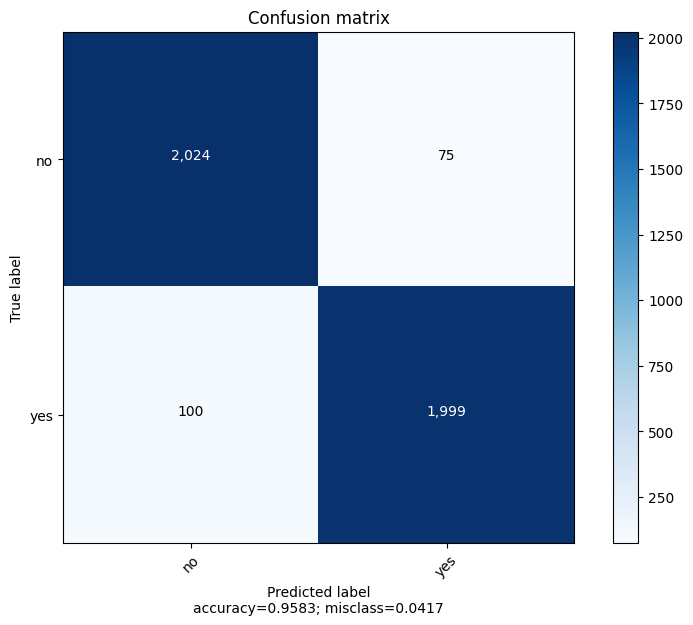

In [ ]:
confusion_mtx = confusion_matrix(y_test_new,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels, normalize=False)

### **RoC Curve**

132/132 [==============================] - 0s 4ms/step


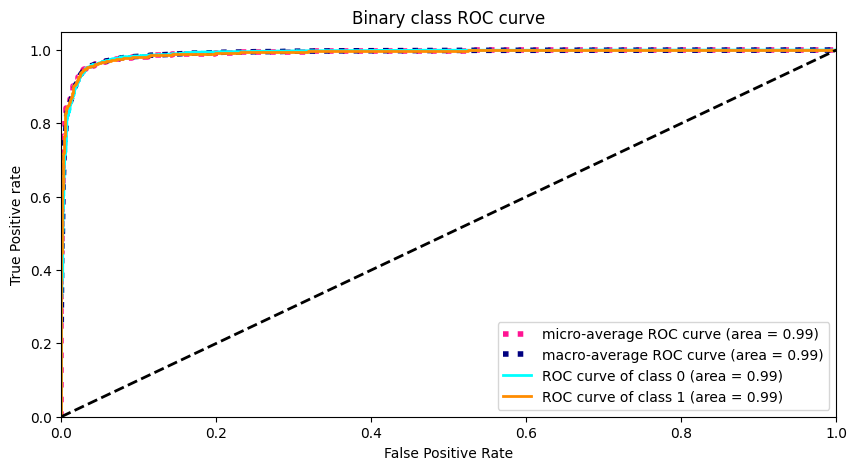

In [ ]:
## Below code is used to calaculate ROC
## The ROC is a metric that provides a single score to compare the performance of different models.
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

pred = cnn_model.predict(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_new, pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new, pred[:,i],pos_label = i)
# Compute micro-average ROC curve and ROC area

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize = (10,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Binary class ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/6dAmodel1_CNN_ROC_1',dpi = 400);

## **6DA-Model 02 - 4DA CNN model from scratch with Five Layers - Completed**

In [ ]:
# Define the input shape
input_shape = (224, 224, 3)

# Define the model
cnn_model1 = tf.keras.Sequential([
    # Convolutional layer 1
    layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    # Convolutional layer 2
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    # Convolutional layer 3
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    # Convolutional layer 4
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    # Convolutional layer 5
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    # FC Layer
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(2, activation='sigmoid')
])

In [ ]:
cnn_model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 batch_normalization_14 (Bat  (None, 111, 111, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                      

In [ ]:
# Compile the model with binary cross-entropy loss and Adam optimizer
cnn_model1.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#checkpoint = ModelCheckpoint("/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/6DA_Model1_CNN.h5",monitor="val_loss",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)

#### **Training The Model**

In [ ]:
history = cnn_model1.fit(X_train,y_train,validation_split=0.1, shuffle = True, epochs = 100, verbose=1, batch_size=64,
                   callbacks=[reduce_lr])

Epoch 1/100
237/237 [==============================] - 5s 18ms/step - loss: 0.4510 - accuracy: 0.8074 - val_loss: 0.4326 - val_accuracy: 0.8036 - lr: 1.0000e-04
Epoch 2/100
237/237 [==============================] - 4s 16ms/step - loss: 0.2714 - accuracy: 0.8966 - val_loss: 0.2221 - val_accuracy: 0.9238 - lr: 1.0000e-04
Epoch 3/100
237/237 [==============================] - 4s 16ms/step - loss: 0.1886 - accuracy: 0.9335 - val_loss: 0.1866 - val_accuracy: 0.9286 - lr: 1.0000e-04
Epoch 4/100
237/237 [==============================] - 4s 16ms/step - loss: 0.1368 - accuracy: 0.9573 - val_loss: 0.2230 - val_accuracy: 0.9143 - lr: 1.0000e-04
Epoch 5/100
237/237 [==============================] - 4s 16ms/step - loss: 0.1064 - accuracy: 0.9678 - val_loss: 0.1223 - val_accuracy: 0.9655 - lr: 1.0000e-04
Epoch 6/100
237/237 [==============================] - 4s 16ms/step - loss: 0.0787 - accuracy: 0.9803 - val_loss: 0.7757 - val_accuracy: 0.7905 - lr: 1.0000e-04
Epoch 7/100
237/237 [=============

In [ ]:
#saving the trained model
cnn_model1.save('/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/6dAmodel2_CNN.h5')

### **Model Training and Validation Curves and Loss Curves**

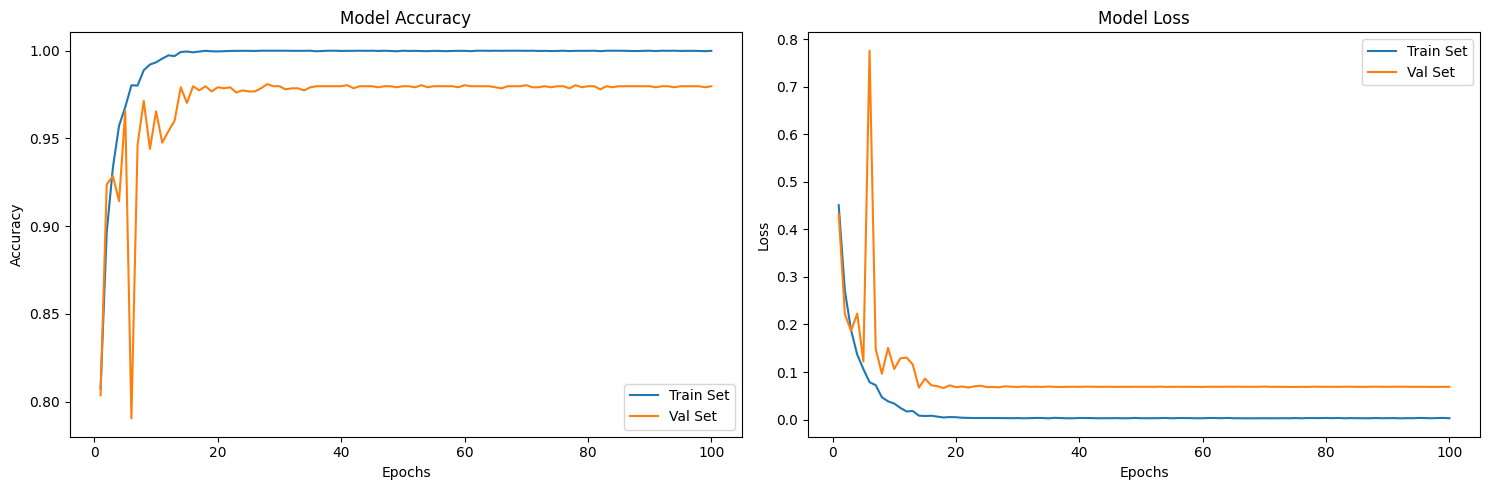

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### **Prediction on test data**

In [ ]:
pred = cnn_model1.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

132/132 [==============================] - 1s 4ms/step


### **Evaluation on Test Data**

In [ ]:
loss,acc = cnn_model1.evaluate(X_test,y_test,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

132/132 [==============================] - 1s 5ms/step - loss: 0.0627 - accuracy: 0.9805
Test Accuracy:  98.05


In [ ]:
#Classification Report
print(classification_report(y_test_new,pred,target_names = labels, digits = 4))

              precision    recall  f1-score   support

          no     0.9773    0.9838    0.9805      2099
         yes     0.9837    0.9771    0.9804      2099

    accuracy                         0.9805      4198
   macro avg     0.9805    0.9805    0.9805      4198
weighted avg     0.9805    0.9805    0.9805      4198



### **Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

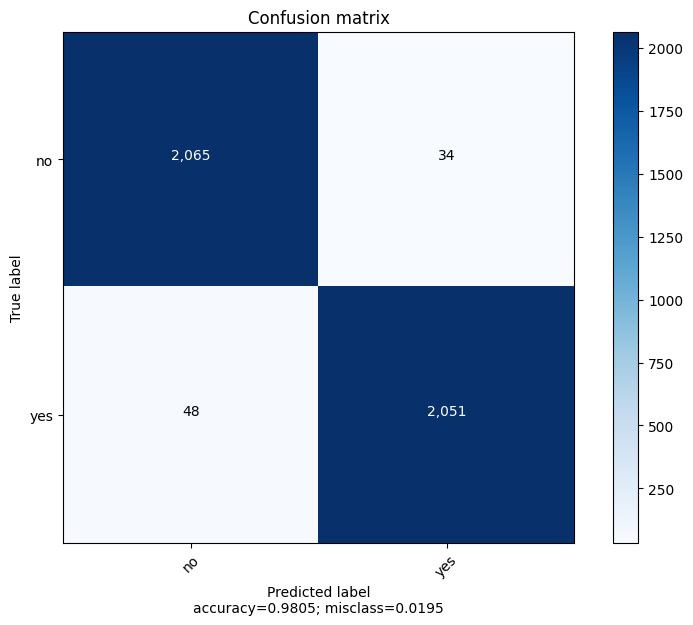

In [ ]:
confusion_mtx = confusion_matrix(y_test_new,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels, normalize=False)

### **RoC Curve**

132/132 [==============================] - 1s 4ms/step


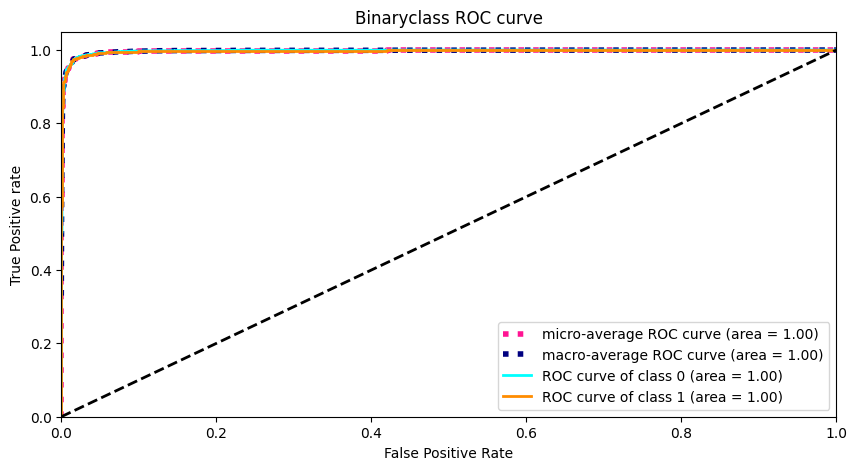

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

pred = cnn_model1.predict(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_new, pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new, pred[:,i],pos_label = i)
# Compute micro-average ROC curve and ROC area

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize = (10,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Binaryclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/6dAmodel2_CNN_ROC_1',dpi = 400);

## **6DA-Model 03 - CNN model from scratch with Seven Conv and 2 FC Layers - Completed**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define input shape
input_shape = (224, 224, 3)

# Define the model
CNN_model = tf.keras.Sequential([
    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Convolutional layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Convolutional layer 4
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Convolutional layer 5
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    # Convolutional layer 6
    layers.Conv2D(1024, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    # Convolutional layer 7
    layers.Conv2D(2048, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    # Flatten the output from convolutional layers
    layers.Flatten(),

    # Fully connected layer 1
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Fully connected layer 2
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Output layer
    layers.Dense(2, activation='sigmoid')
])


In [ ]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [ ]:
# Compile the model with binary cross-entropy loss and Adam optimizer
CNN_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#checkpoint = ModelCheckpoint("/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/4daModel3_CNN.h5",monitor="val_loss",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)

### **Training The Model**

In [ ]:
history = CNN_model.fit(X_train,y_train,validation_split=0.1, shuffle = True, epochs = 100, verbose=1, batch_size=32,
                   callbacks=[reduce_lr])

Epoch 1/100
473/473 [==============================] - 21s 21ms/step - loss: 0.5344 - accuracy: 0.7917 - val_loss: 0.3186 - val_accuracy: 0.8619 - lr: 1.0000e-04
Epoch 2/100
473/473 [==============================] - 9s 18ms/step - loss: 0.3239 - accuracy: 0.8821 - val_loss: 0.2477 - val_accuracy: 0.9060 - lr: 1.0000e-04
Epoch 3/100
473/473 [==============================] - 9s 18ms/step - loss: 0.2118 - accuracy: 0.9251 - val_loss: 0.3060 - val_accuracy: 0.9012 - lr: 1.0000e-04
Epoch 4/100
473/473 [==============================] - 9s 18ms/step - loss: 0.1414 - accuracy: 0.9494 - val_loss: 0.1466 - val_accuracy: 0.9464 - lr: 1.0000e-04
Epoch 5/100
473/473 [==============================] - 9s 18ms/step - loss: 0.0937 - accuracy: 0.9674 - val_loss: 0.1632 - val_accuracy: 0.9506 - lr: 1.0000e-04
Epoch 6/100
473/473 [==============================] - 9s 18ms/step - loss: 0.0764 - accuracy: 0.9749 - val_loss: 0.2384 - val_accuracy: 0.9256 - lr: 1.0000e-04
Epoch 7/100
473/473 [============

In [ ]:
#saving the trained model
CNN_model.save('/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/6dAmodel3_CNN.h5')

### **Model Training and Validation Curves and Loss Curves**

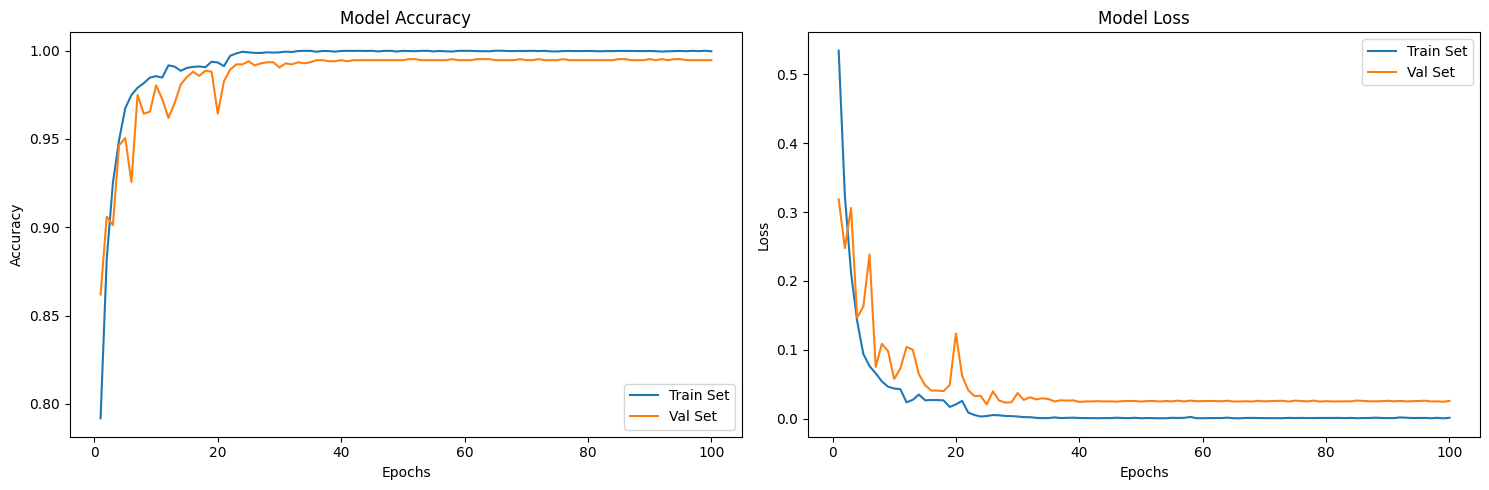

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### **Prediction on Test Data**

In [ ]:
pred = CNN_model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

132/132 [==============================] - 1s 7ms/step


### **Evaluation on Test Data**

In [ ]:
loss,acc = CNN_model.evaluate(X_test,y_test,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

132/132 [==============================] - 1s 7ms/step - loss: 0.0165 - accuracy: 0.9950
Test Accuracy:  99.5


In [ ]:
print(classification_report(y_test_new,pred,target_names = labels, digits = 4))

              precision    recall  f1-score   support

          no     0.9943    0.9957    0.9950      2099
         yes     0.9957    0.9943    0.9950      2099

    accuracy                         0.9950      4198
   macro avg     0.9950    0.9950    0.9950      4198
weighted avg     0.9950    0.9950    0.9950      4198



### **Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

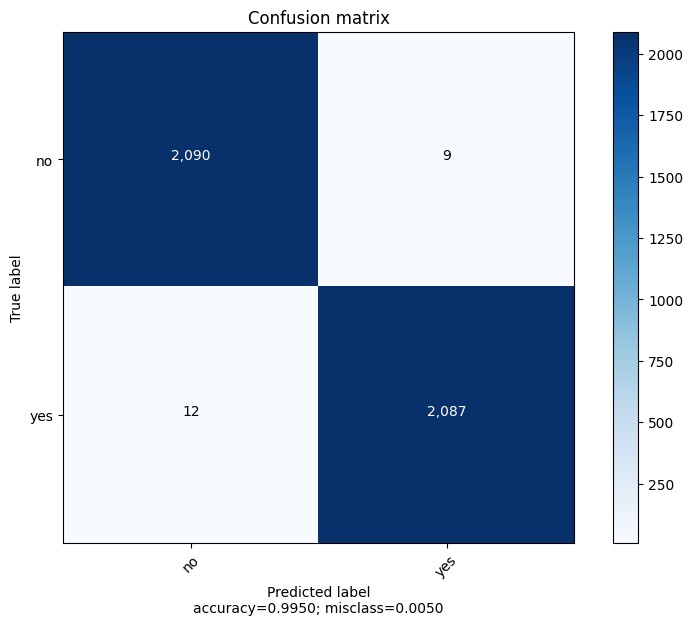

In [ ]:
confusion_mtx = confusion_matrix(y_test_new,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels, normalize=False)

### **RoC Curve**

132/132 [==============================] - 1s 6ms/step


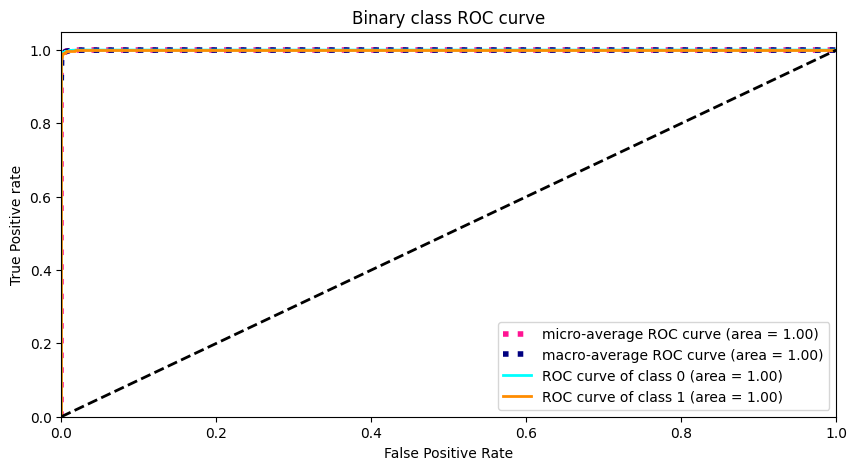

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

pred = CNN_model.predict(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_new, pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new, pred[:,i],pos_label = i)
# Compute micro-average ROC curve and ROC area

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize = (10,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Binary class ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/6dAmodel3_CNN_ROC_1',dpi = 400);

# **Pretrained Models**

## **6 DA Model: Pre-trained - ResNet50 - Completed**

In [ ]:
#Downloading Resnet50 model
resnet_model = ResNet50( weights = 'imagenet',include_top = False, input_shape = (image_size,image_size,3))

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
#printing layers of the pretrained ResNet50 model
for i, layer in enumerate(resnet_model.layers):
    print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
#adding layers at the top of the classifier
model = resnet_model.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.4)(model)
model = tf.keras.layers.Dense(256)(model)
model = tf.keras.layers.Dense(2,activation='sigmoid')(model)
model = tf.keras.models.Model(inputs=resnet_model.input, outputs = model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/6daresnet50-{epoch}.h5",monitor="val_loss",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)

### **Training The Model**

In [ ]:
history = model.fit(X_train,y_train,validation_split = 0.1 , shuffle = True, epochs = 100, verbose=1, batch_size=32,
                   callbacks=[reduce_lr])

Epoch 1/100
473/473 [==============================] - 45s 61ms/step - loss: 0.0531 - accuracy: 0.9809 - val_loss: 0.0288 - val_accuracy: 0.9905 - lr: 1.0000e-04
Epoch 2/100
473/473 [==============================] - 26s 55ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0182 - val_accuracy: 0.9952 - lr: 1.0000e-04
Epoch 3/100
473/473 [==============================] - 26s 55ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0132 - val_accuracy: 0.9964 - lr: 1.0000e-04
Epoch 4/100
473/473 [==============================] - 26s 55ms/step - loss: 0.0123 - accuracy: 0.9969 - val_loss: 0.0077 - val_accuracy: 0.9982 - lr: 1.0000e-04
Epoch 5/100
473/473 [==============================] - 26s 55ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.0042 - val_accuracy: 0.9982 - lr: 1.0000e-04
Epoch 6/100
473/473 [==============================] - 26s 54ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0043 - val_accuracy: 0.9976 - lr: 1.0000e-04
Epoch 7/100
473/473 [=======

In [ ]:
#saving trained model
model.save("/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/6daresnet50_model.h5")

### **Model Training and Validation Curves and Loss Curves**

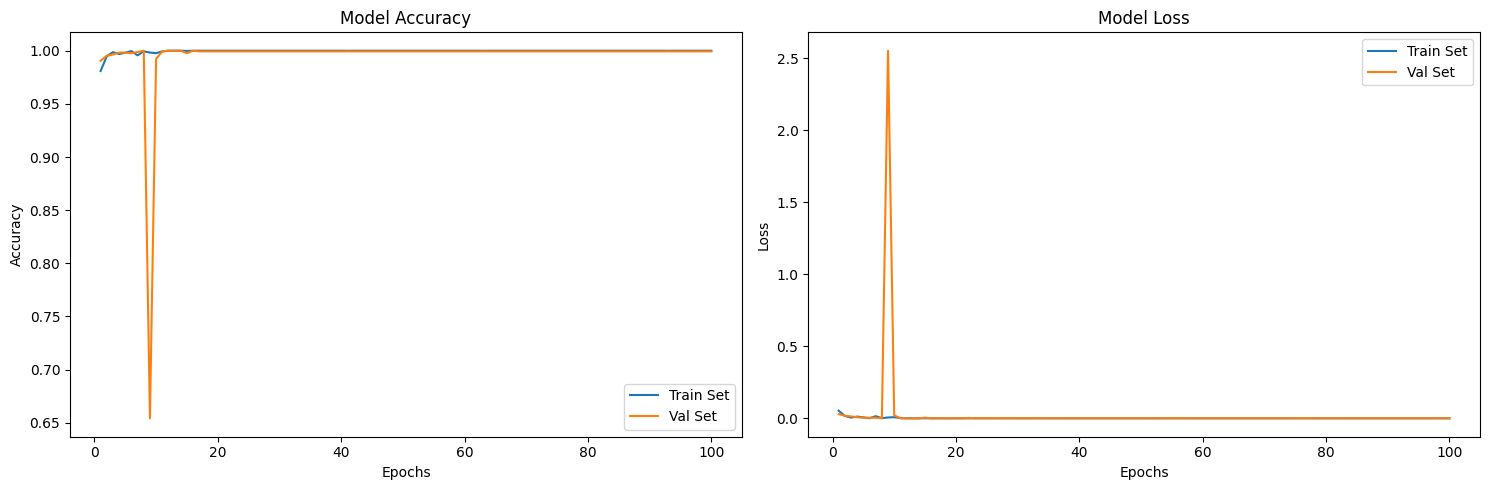

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### **Prediction on Test Data**

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

132/132 [==============================] - 3s 16ms/step


### **Evaluation on Test Data**

In [ ]:
loss,acc = model.evaluate(X_test,y_test,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

132/132 [==============================] - 2s 17ms/step - loss: 0.0020 - accuracy: 0.9995
Test Accuracy:  99.95


In [ ]:
print(classification_report(y_test_new,pred,target_names = labels, digits = 4))

              precision    recall  f1-score   support

          no     0.9995    0.9995    0.9995      2099
         yes     0.9995    0.9995    0.9995      2099

    accuracy                         0.9995      4198
   macro avg     0.9995    0.9995    0.9995      4198
weighted avg     0.9995    0.9995    0.9995      4198



### **Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

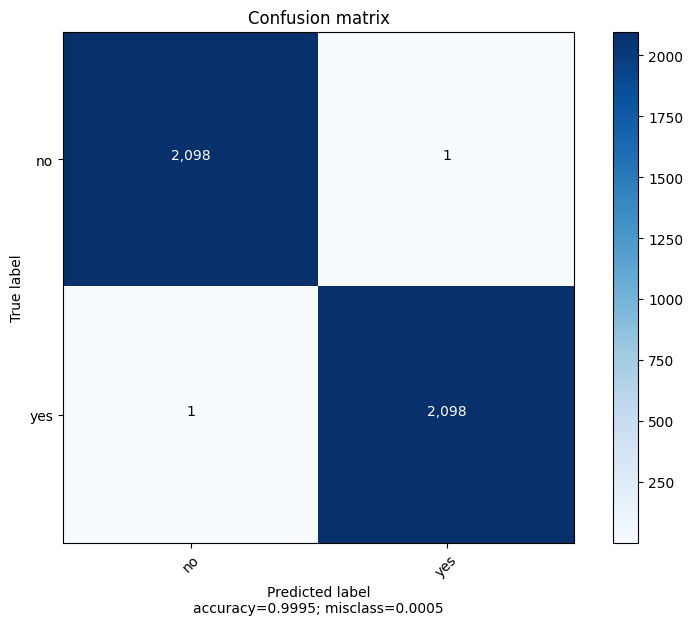

In [ ]:
confusion_mtx = confusion_matrix(y_test_new,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels, normalize=False)

### **RoC Curve**

132/132 [==============================] - 2s 14ms/step


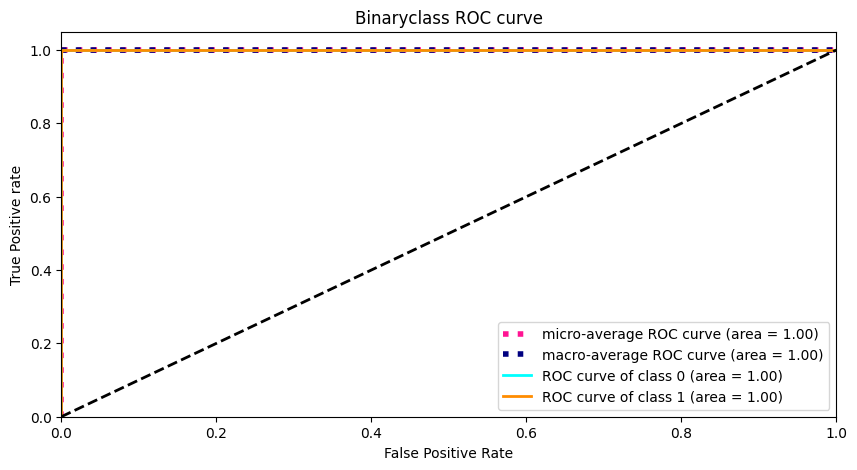

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

pred = model.predict(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_new, pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new, pred[:,i],pos_label = i)
# Compute micro-average ROC curve and ROC area

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize = (10,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Binaryclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/4DaResnet50_ROC1',dpi = 500);

## **6DAModel: Pre-trained - EfficientNetB3 - Completed**

In [ ]:
#load pre-trained EfficientNet weights
image_size = 224
effnetb3 = EfficientNetB3(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

In [ ]:
#adding custom layers at the top of the classifier
model = effnetb3.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(2,activation='sigmoid')(model)
model = tf.keras.models.Model(inputs=effnetb3.input, outputs = model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0]']      

In [ ]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#checkpoint = ModelCheckpoint("/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/effnetb1.h5",monitor="val_loss",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
ep = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

### **Training The Model**

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, shuffle = True, epochs = 100, verbose=1, batch_size=32,callbacks=[reduce_lr,ep])

Epoch 1/100
473/473 [==============================] - 75s 123ms/step - loss: 0.0816 - accuracy: 0.9711 - val_loss: 9.5897e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 2/100
473/473 [==============================] - 55s 117ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0018 - val_accuracy: 0.9994 - lr: 1.0000e-04
Epoch 3/100
473/473 [==============================] - 55s 117ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.2918e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 4/100
473/473 [==============================] - 55s 117ms/step - loss: 6.5685e-04 - accuracy: 1.0000 - val_loss: 4.1171e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/100
473/473 [==============================] - 55s 117ms/step - loss: 6.7323e-04 - accuracy: 0.9998 - val_loss: 9.4339e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 6/100
472/473 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9994
Epoch 6: ReduceLROnPlateau reducing learning rate to 2.999999924

In [ ]:
model.save('/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/6DaResnet50')

### **Model Training and Validation Curves and Loss Curves**

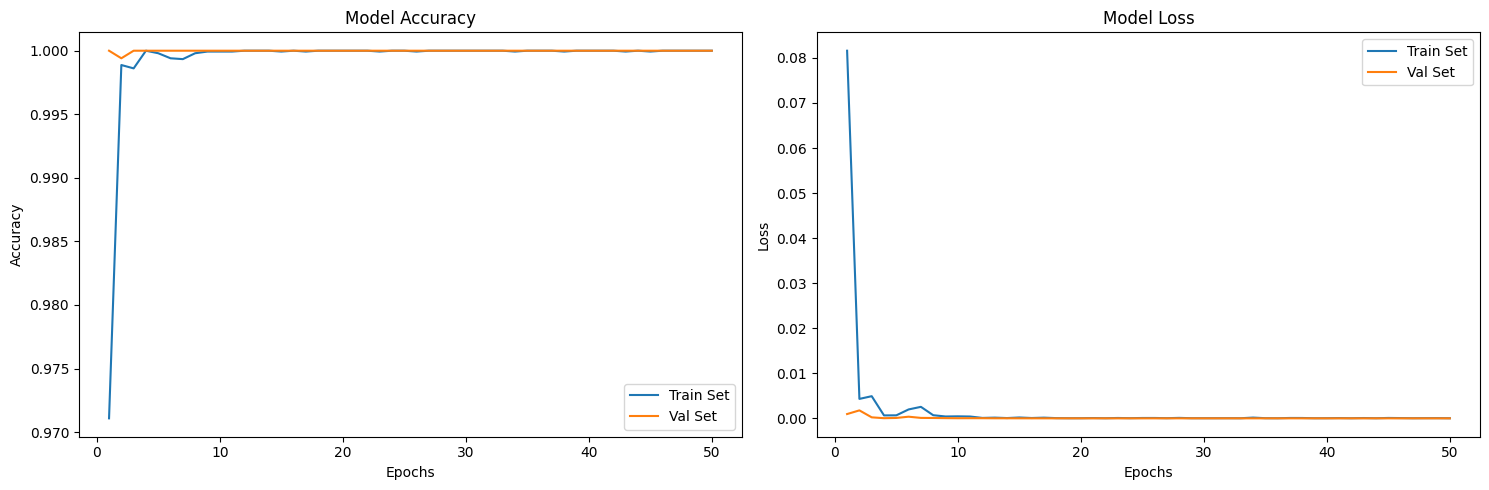

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### **Prediction on Test Data**

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

132/132 [==============================] - 5s 22ms/step


### **Evaluation on Test Data**

In [ ]:
loss,acc = model.evaluate(X_test,y_test,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

132/132 [==============================] - 3s 24ms/step - loss: 4.8455e-04 - accuracy: 0.9998
Test Accuracy:  99.98


In [ ]:
print(classification_report(y_test_new,pred,target_names = labels, digits = 4))

              precision    recall  f1-score   support

          no     0.9995    1.0000    0.9998      2099
         yes     1.0000    0.9995    0.9998      2099

    accuracy                         0.9998      4198
   macro avg     0.9998    0.9998    0.9998      4198
weighted avg     0.9998    0.9998    0.9998      4198



### **Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

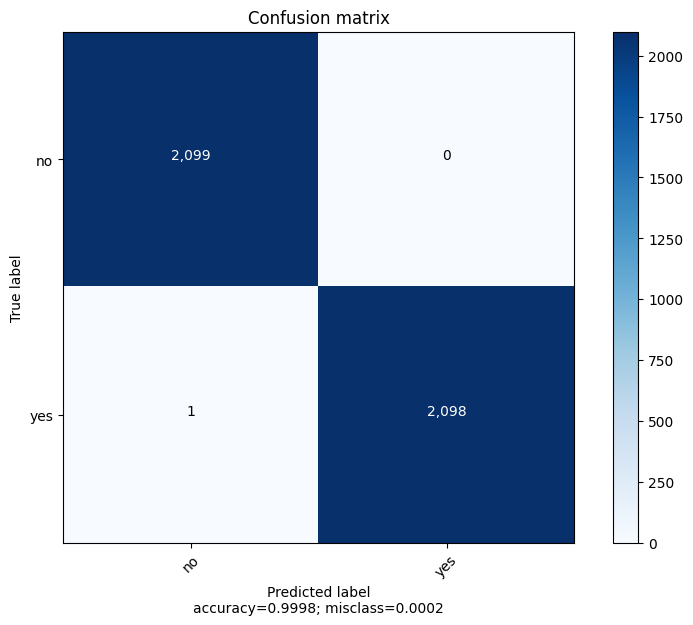

In [ ]:
confusion_mtx = confusion_matrix(y_test_new,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels, normalize=False)

### **RoC Curve**

132/132 [==============================] - 3s 22ms/step


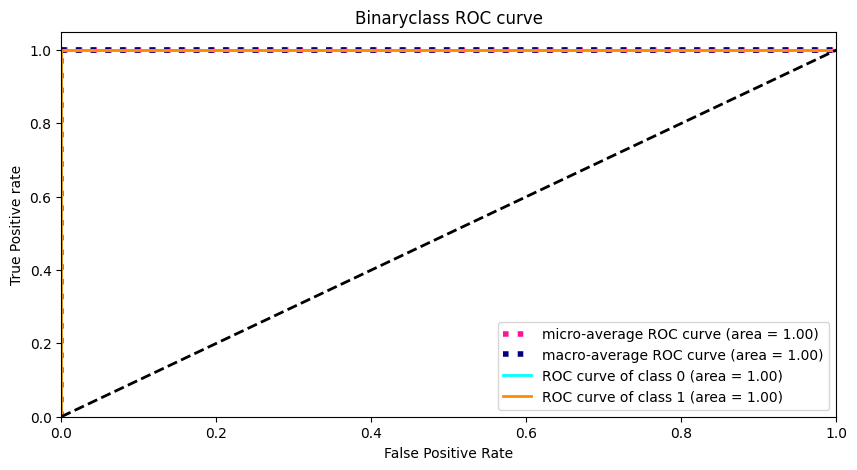

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

pred = model.predict(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_new, pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new, pred[:,i],pos_label = i)
# Compute micro-average ROC curve and ROC area

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize = (10,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Binaryclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/6DaResnet50_ROC1',dpi = 500);

## **6DAModel: Fine Tuned Pre-trained - VGG-19 - Completed**

In [ ]:
# Defining and Laoding the pretrained VGG16 model
np.random.seed(42)
base_model = VGG19( weights='imagenet',
    include_top=False,
    input_shape=(224,224,3))

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
#printing layers of the model
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_2
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# finetunning - freezing early 4 layers and training later layers of the model
for layer in base_model.layers[:4]:
    layer.trainable = False
for layer in base_model.layers[4:]:
    layer.trainable = True

In [ ]:
# adding custom layers at the top of the pretrained classifier
NUM_CLASSES = 2
model2 = Sequential()
model2.add(base_model)
model2.add(Flatten())
model2.add(Dense(1024, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(NUM_CLASSES, activation='sigmoid'))

In [ ]:
# compiling the model
model2.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              25691136  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 45,717,570
Trainable params: 45,678,850
Non-trainable params: 38,720
_________________________________________________________________


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

### **Training of the model**

In [ ]:
epochs = 50
history = model2.fit(X_train, y_train, validation_split = 0.1 , epochs = epochs, verbose = 1, batch_size = 32, callbacks = callback)

Epoch 1/50
473/473 [==============================] - 29s 56ms/step - loss: 0.4687 - accuracy: 0.7808 - val_loss: 0.3180 - val_accuracy: 0.8619
Epoch 2/50
473/473 [==============================] - 24s 52ms/step - loss: 0.1419 - accuracy: 0.9481 - val_loss: 0.0633 - val_accuracy: 0.9833
Epoch 3/50
473/473 [==============================] - 25s 52ms/step - loss: 0.0574 - accuracy: 0.9812 - val_loss: 0.1327 - val_accuracy: 0.9548
Epoch 4/50
473/473 [==============================] - 25s 52ms/step - loss: 0.0343 - accuracy: 0.9888 - val_loss: 0.0203 - val_accuracy: 0.9929
Epoch 5/50
473/473 [==============================] - 25s 52ms/step - loss: 0.0347 - accuracy: 0.9882 - val_loss: 0.0766 - val_accuracy: 0.9726
Epoch 6/50
473/473 [==============================] - 25s 52ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0179 - val_accuracy: 0.9952
Epoch 7/50
473/473 [==============================] - 24s 52ms/step - loss: 0.0175 - accuracy: 0.9950 - val_loss: 0.0479 - val_accuracy:

In [ ]:
#Saving the trained model
model2.save('/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/6davgg19.h5')

### **Model Training and Validation Curves and Loss Curves**

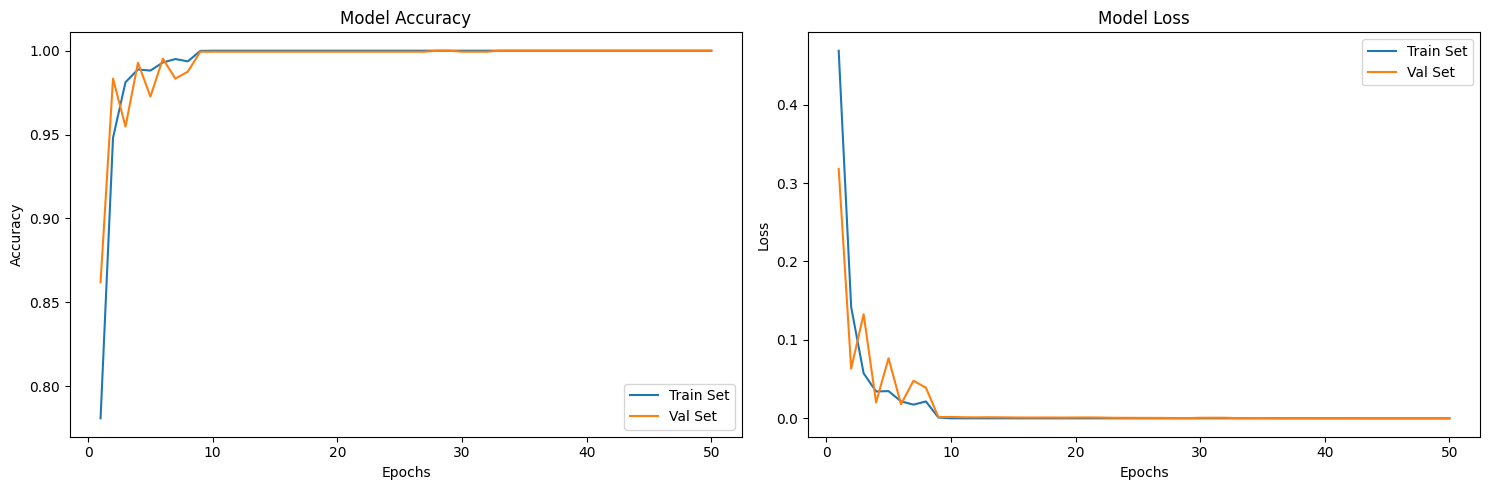

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### **Prediction on Test Data**

In [ ]:
pred = model2.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

132/132 [==============================] - 3s 24ms/step


### **Evaluation on Test Data**

In [ ]:
loss,acc = model2.evaluate(X_test,y_test,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

132/132 [==============================] - 3s 23ms/step - loss: 0.0142 - accuracy: 0.9990
Test Accuracy:  99.9


In [ ]:
print(classification_report(y_test_new,pred,target_names = labels, digits = 4))

              precision    recall  f1-score   support

          no     0.9995    0.9986    0.9990      2099
         yes     0.9986    0.9995    0.9990      2099

    accuracy                         0.9990      4198
   macro avg     0.9990    0.9990    0.9990      4198
weighted avg     0.9990    0.9990    0.9990      4198



### **Confusion Matrix**

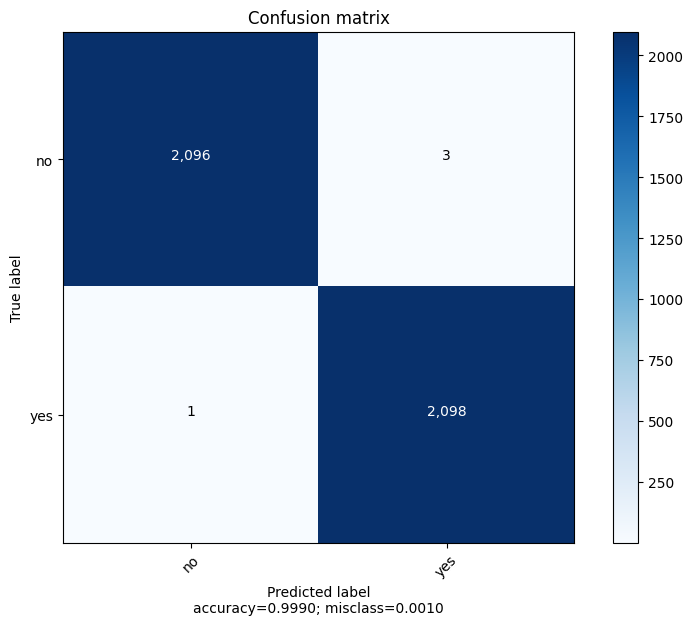

In [ ]:
confusion_mtx = confusion_matrix(y_test_new,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels, normalize=False)

### **RoC Curve**

132/132 [==============================] - 3s 21ms/step


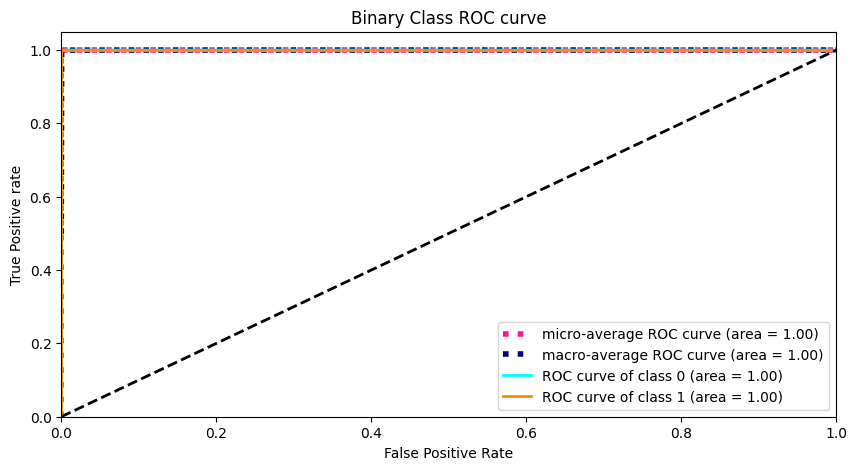

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

pred = model2.predict(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_new, pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new, pred[:,i],pos_label = i)
# Compute micro-average ROC curve and ROC area

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize = (10,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Binary Class ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/6DAVgg16classROC_2',dpi = 500);

## **6DAModel: Fine Tuned Pre-trained - DenseNet169 - Completed**

In [ ]:
#Defining and Loading pretrained DenseNet121 model
densenet_model = DenseNet169(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

51877672/51877672 [==============================] - 0s 0us/step


In [ ]:
#Printing all layers of the pretrained model
for i, layer in enumerate(densenet_model.layers):
    print(i, layer.name)

0 input_1
1 zero_padding2d
2 conv1/conv
3 conv1/bn
4 conv1/relu
5 zero_padding2d_1
6 pool1
7 conv2_block1_0_bn
8 conv2_block1_0_relu
9 conv2_block1_1_conv
10 conv2_block1_1_bn
11 conv2_block1_1_relu
12 conv2_block1_2_conv
13 conv2_block1_concat
14 conv2_block2_0_bn
15 conv2_block2_0_relu
16 conv2_block2_1_conv
17 conv2_block2_1_bn
18 conv2_block2_1_relu
19 conv2_block2_2_conv
20 conv2_block2_concat
21 conv2_block3_0_bn
22 conv2_block3_0_relu
23 conv2_block3_1_conv
24 conv2_block3_1_bn
25 conv2_block3_1_relu
26 conv2_block3_2_conv
27 conv2_block3_concat
28 conv2_block4_0_bn
29 conv2_block4_0_relu
30 conv2_block4_1_conv
31 conv2_block4_1_bn
32 conv2_block4_1_relu
33 conv2_block4_2_conv
34 conv2_block4_concat
35 conv2_block5_0_bn
36 conv2_block5_0_relu
37 conv2_block5_1_conv
38 conv2_block5_1_bn
39 conv2_block5_1_relu
40 conv2_block5_2_conv
41 conv2_block5_concat
42 conv2_block6_0_bn
43 conv2_block6_0_relu
44 conv2_block6_1_conv
45 conv2_block6_1_bn
46 conv2_block6_1_relu
47 conv2_block6_

In [ ]:
for layer in densenet_model.layers:
    layer.trainable = False

In [ ]:
# finetunning - freezing early 369 layers and training later layers of the model
for layer in densenet_model.layers[:369]:
    layer.trainable = False
for layer in densenet_model.layers[369:]:
    layer.trainable = True

In [ ]:
#adding custom layers at the top of the model
NUM_CLASSES = 2

model = Sequential()
model.add(densenet_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='sigmoid'))

In [ ]:
# Compiling the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 global_average_pooling2d (G  (None, 1664)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1664)              0         
                                                                 
 dense (Dense)               (None, 512)               852480    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

### **Training of the Model**

In [ ]:
epochs = 50
history = model.fit(X_train, y_train, validation_split = 0.1 , batch_size = 32, epochs = epochs, verbose = 1, callbacks = callback)

Epoch 1/50
473/473 [==============================] - 44s 55ms/step - loss: 0.1767 - accuracy: 0.9324 - val_loss: 0.1177 - val_accuracy: 0.9589
Epoch 2/50
473/473 [==============================] - 21s 44ms/step - loss: 0.0458 - accuracy: 0.9845 - val_loss: 0.0344 - val_accuracy: 0.9875
Epoch 3/50
473/473 [==============================] - 21s 44ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0482 - val_accuracy: 0.9815
Epoch 4/50
473/473 [==============================] - 21s 44ms/step - loss: 0.0330 - accuracy: 0.9895 - val_loss: 0.0161 - val_accuracy: 0.9929
Epoch 5/50
473/473 [==============================] - 21s 44ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.0254 - val_accuracy: 0.9917
Epoch 6/50
473/473 [==============================] - 21s 44ms/step - loss: 0.0166 - accuracy: 0.9942 - val_loss: 0.0301 - val_accuracy: 0.9899
Epoch 7/50
473/473 [==============================] - 21s 44ms/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.0194 - val_accuracy:

In [ ]:
#Saving the trained model
model.save('/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/6dadensenet169.h5')

### **Model Training and Validation Curves and Loss Curves**

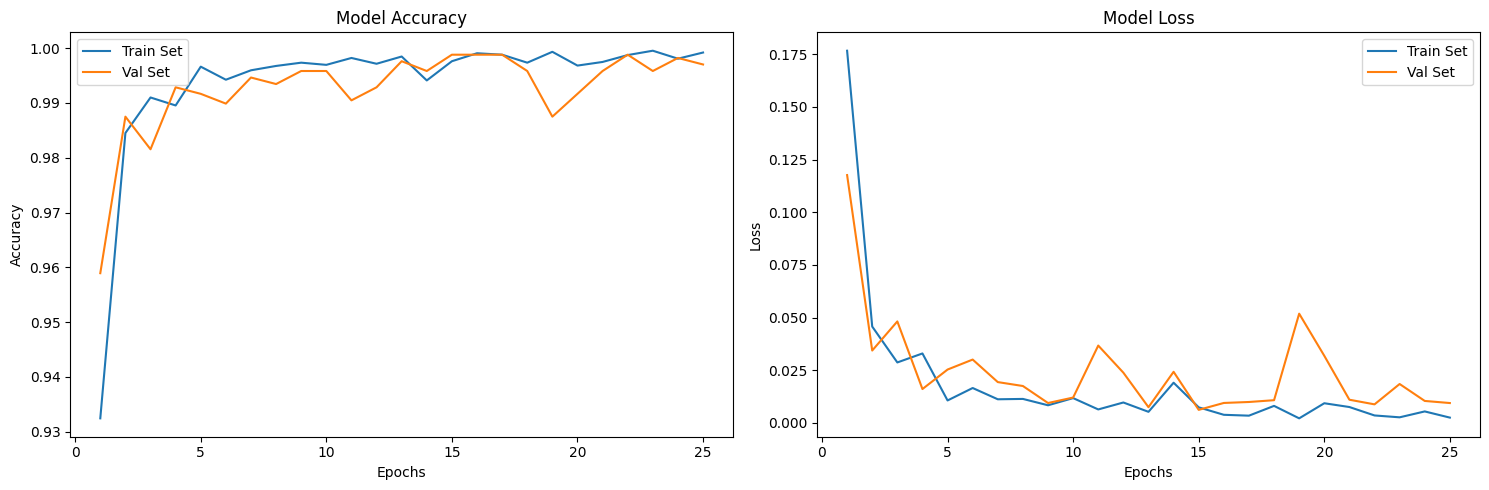

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### **Prediction on Test Data**

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

132/132 [==============================] - 5s 21ms/step


### **Evaluation on Test Data**

In [ ]:
loss,acc = model.evaluate(X_test,y_test,verbose = 1)
print("Test Accuracy: ",np.round(acc*100,2))

132/132 [==============================] - 3s 23ms/step - loss: 0.0091 - accuracy: 0.9971
Test Accuracy:  99.71


In [ ]:
print(classification_report(y_test_new,pred,target_names = labels, digits = 4))

              precision    recall  f1-score   support

          no     0.9957    0.9986    0.9971      2099
         yes     0.9986    0.9957    0.9971      2099

    accuracy                         0.9971      4198
   macro avg     0.9971    0.9971    0.9971      4198
weighted avg     0.9971    0.9971    0.9971      4198



### **Confusion Matrix**

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

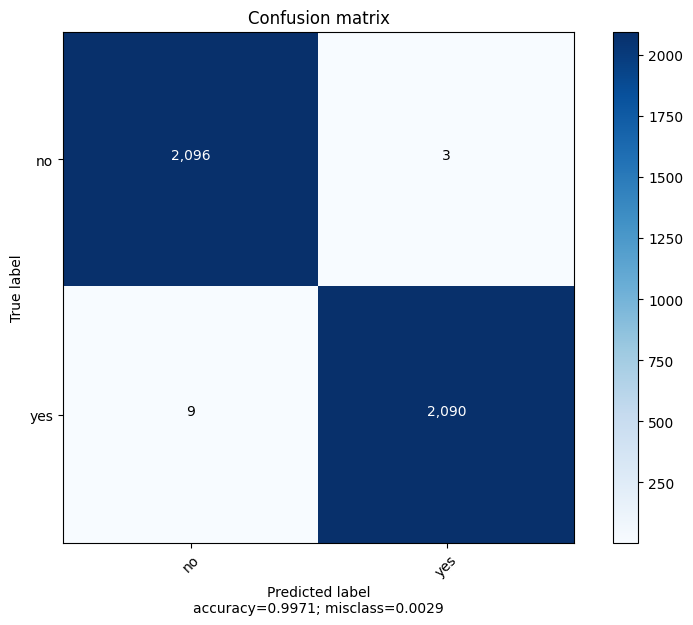

In [ ]:
confusion_mtx = confusion_matrix(y_test_new,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels, normalize=False)

### **RoC Curve**

132/132 [==============================] - 3s 20ms/step


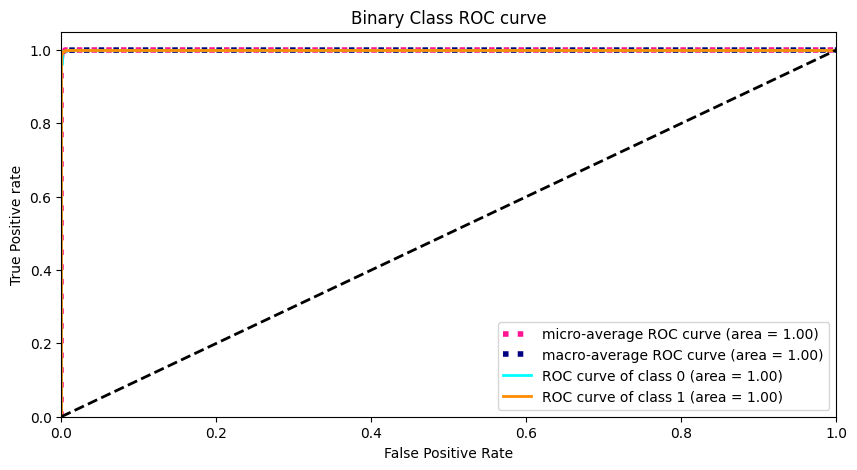

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

pred = model.predict(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_new, pred[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new, pred[:,i],pos_label = i)
# Compute micro-average ROC curve and ROC area

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure(figsize = (10,5))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Binary Class ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.savefig('/content/drive/MyDrive/Project/Brain_Tumor_Detection/Implementation/Saved_Models/6DADenseNet121_2',dpi = 500);

# **Application Phase**

In [ ]:
#Loading Un-seen Image For images
#img_path = '/content/drive/MyDrive/DNN/Chest_X-ray/Data_APP_Phase/PNEUMONIA.jpg'
# For NORMAL
img_path = '/content/drive/MyDrive//DNN/Chest_X-ray/Data_APP_Phase/NORMAL.jpg'

In [ ]:
#Loading and Pre-Processing Image
image_size = 224
image = cv2.imread(img_path)
#image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(image_size, image_size))
image_array = np.array(image)

### **Load the trained model**

In [ ]:
#Load the best saved trained model
best_model = load_model('/content/drive/MyDrive/DNN/Chest_X-ray/Implementation/Saved_Models/ResNet50.h5')

### **Prediction on Unseen Instance**

1.   List item
2.   List item



In [ ]:
# Making prediction on Unseen Image using Trained model
image_array = np.expand_dims(image_array, axis=0)
prediction = best_model.predict(image_array)
prediction = np.argmax(prediction,axis=1)
print(prediction)

1/1 [==============================] - 0s 38ms/step
[0]


 

Trained Model Prediction
 + ============================== +
 |                                |
           Class : Non-Tumorous Image         
      |                            |
 + ============================== +


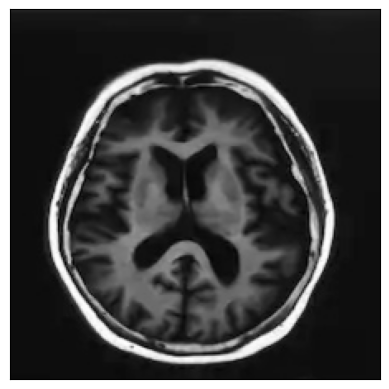

In [ ]:
#Ploting the predictions
if prediction[0] == 0:
  print('\033[1m',"\n\nTrained Model Prediction")
  print('\033[1m',"+","="*30,"+")
  print('\033[1m',"|"," "*30,"|\n           Class : Normal Image         \n","     |                            |")
  print('\033[1m',"+","="*30,"+")
  plt.imshow(image)
  plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
  plt.show()

else:
  print('\033[1m',"\n\nTrained Model Prediction")
  print('\033[1m',"+","="*30,"+")
  print('\033[1m',"|"," "*30,"|\n           Class : Pneumonia Image       \n","|                            |")
  print('\033[1m',"+","="*30,"+")
  plt.imshow(image)
  plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
  plt.show()